In [5]:
import numpy as np
import pandas as pd
import mplleaflet
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mplleaflet      

  Preparing metadata (setup.py) ... done
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28566 sha256=b718341598162378b42c7ff4b62948de5d5b69cbf3604149cb901a7edb221ef7
  Stored in directory: /Users/limqijie/Library/Caches/pip/wheels/54/11/d6/5d25309bb8b662bd29880f7ffec893b66ffa677086a436c041
Successfully built mplleaflet


In [9]:
df

,order_id,depot_id,type,parcel_size,dest_zone_alpha,scanned_at,dest_zone
0,165387601,103410,global_inbound,s,F,9/1/23 18:30,F01-C (LORONG 6 TOA PAYOH)
1,165387601,103410,global_inbound,s,F,9/1/23 18:59,F01-C (LORONG 6 TOA PAYOH)
2,165387601,255,warehouse_sweep,s,F,10/1/23 6:54,F01-C (LORONG 6 TOA PAYOH)
3,166121091,2,warehouse_sweep,m,D,3/1/23 21:51,D09-H
4,166121091,2,warehouse_sweep,m,D,3/1/23 21:52,D09-H
...,...,...,...,...,...,...,...
3493,168393941,103410,global_inbound,s,G,26/1/23 22:31,G12-F (YISHUN STREET 42)
3494,168393941,103430,global_inbound,s,G,26/1/23 22:33,G12-F (YISHUN STREET 42)
3495,168393941,251,warehouse_sweep,s,G,27/1/23 5:27,G12-F (YISHUN STREET 42)
3496,168395421,103410,global_inbound,s,J,24/1/23 20:24,J09-G (LORONG 40 GEYLANG)


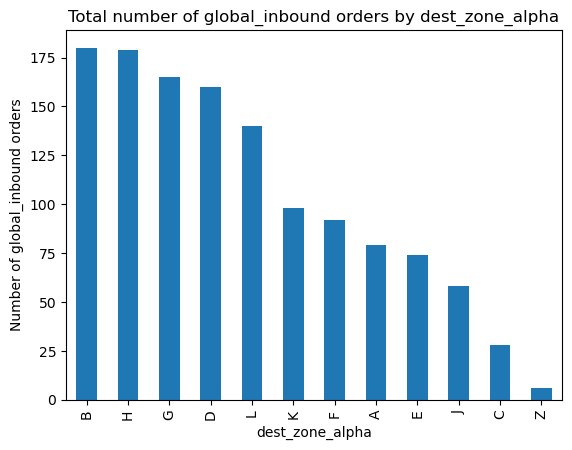

In [23]:
df = pd.read_csv('warehouse_scans_with_order_details2.csv')



# Count the number of global_inbound orders for each distinct order_id
global_inbound_counts = global_inbound_df['dest_zone_alpha'].value_counts() #.sort_index()

# Create a bar plot
global_inbound_counts.plot(kind='bar')
plt.xlabel('dest_zone_alpha')
plt.ylabel('Number of global_inbound orders')
plt.title('Total number of global_inbound orders by dest_zone_alpha')
plt.show()


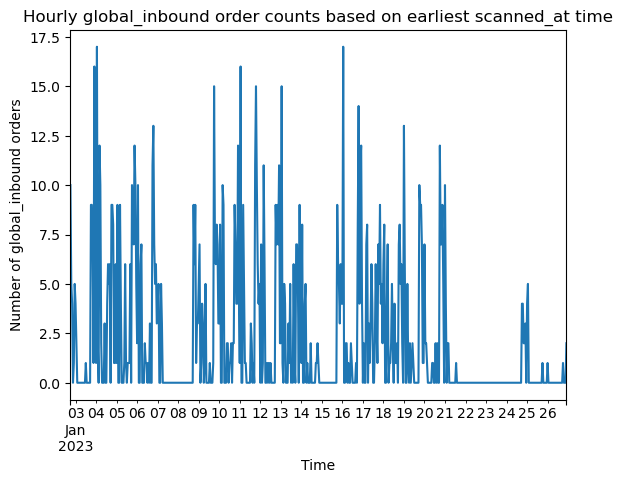

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas DataFrame
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to include only global_inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Convert the scanned_at column to a datetime data type
global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)

# Group the data by hourly intervals based on the earliest scanned_at time
global_inbound_counts = global_inbound_df.set_index('scanned_at').groupby(pd.Grouper(freq='H')).size()

# Create a line plot
global_inbound_counts.plot()
plt.xlabel('Time')
plt.ylabel('Number of global_inbound orders')
plt.title('Hourly global_inbound order counts based on earliest scanned_at time')
plt.show()


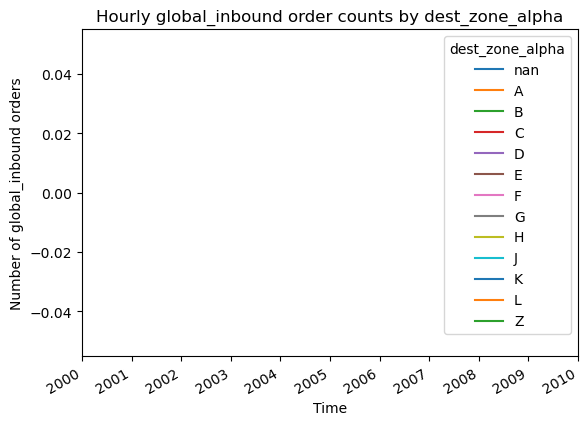

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the data into a pandas DataFrame
df = pd.read_csv('warehouse_scans_with_order_details2.csv')

# Filter the data to include only global_inbound orders
global_inbound_df = df[df['type'] == 'global_inbound']

# Convert the scanned_at column to a datetime data type
global_inbound_df['scanned_at'] = pd.to_datetime(global_inbound_df['scanned_at'], dayfirst=True)

# Get the earliest and latest scanned_at time
earliest_time = global_inbound_df['scanned_at'].min()
latest_time = global_inbound_df['scanned_at'].max()

# Create an empty DataFrame with a multi-index of hourly intervals and dest_zone_alpha values
index = pd.MultiIndex.from_product([global_inbound_df['dest_zone_alpha'].unique(), pd.date_range(start=earliest_time, end=latest_time, freq='H')], names=['dest_zone_alpha', 'scanned_at'])
hourly_counts_df = pd.DataFrame(index=index, columns=['hourly_count'])

# Group the data by hourly intervals and dest_zone_alpha values, and count the number of orders for each group
hourly_counts = global_inbound_df.groupby(['dest_zone_alpha', pd.Grouper(key='scanned_at', freq='H')]).size()

# Fill in the empty DataFrame with the hourly counts
hourly_counts_df.update(hourly_counts)

# Reshape the DataFrame to have dest_zone_alpha values as columns and hourly intervals as rows
hourly_counts_by_dest = hourly_counts_df.reset_index().pivot(index='scanned_at', columns='dest_zone_alpha', values='hourly_count')

# Create a line plot
hourly_counts_by_dest.plot()
plt.xlabel('Time')
plt.ylabel('Number of global_inbound orders')
plt.title('Hourly global_inbound order counts by dest_zone_alpha')
plt.show()
